# The harry potter network

Or how we could spoil almost the entire series with network science.

In [1]:
import graph_tool.all as gt
import pandas as pd
import numpy as np

In [2]:
nodes = pd.read_csv('https://raw.githubusercontent.com/efekarakus/potter-network/master/data/characters.csv')

In [5]:
edges.head()

,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+


In [4]:
edges = pd.read_csv('https://raw.githubusercontent.com/efekarakus/potter-network/master/data/relations.csv')

Sort rows of columns source and target

In [6]:
sorted_cols = edges[['source', 'target']].apply(sorted, axis=1)

Assign new values to the columns

In [31]:
edges['source'] = sorted_cols.str[0]
edges['target'] = sorted_cols.str[1]

Finally, drop duplicated edges and self loops

In [32]:
edges.shape

(513, 3)

In [34]:
edges.shape

(330, 3)

In [33]:
edges = edges.drop_duplicates(subset=['source', 'target'])
edges = edges[edges['source'] != edges['target']]

Replace values in columns type to values 1 or 0

In [35]:
edges['type'] = edges['type'].replace({'+': 1,
                                       '-': 0})

In [64]:
A = np.array([[0,1,3,4.],
              [2,3,1,3.],
              [1,2,3,9.]])
h = gt.Graph()
ep1 = h.new_ep('int')
ep2 = h.new_ep('float')
h.add_edge_list(A, eprops=[ep1, ep2])

In [44]:
g = gt.Graph(directed=False)
polarity = g.new_ep('bool')
g.add_edge_list(edges.values, eprops=[polarity])

In [45]:
g

<Graph object, undirected, with 65 vertices and 330 edges, at 0x7ffa1c293b80>

Set the positions for later

In [46]:
pos = gt.sfdp_layout(g)

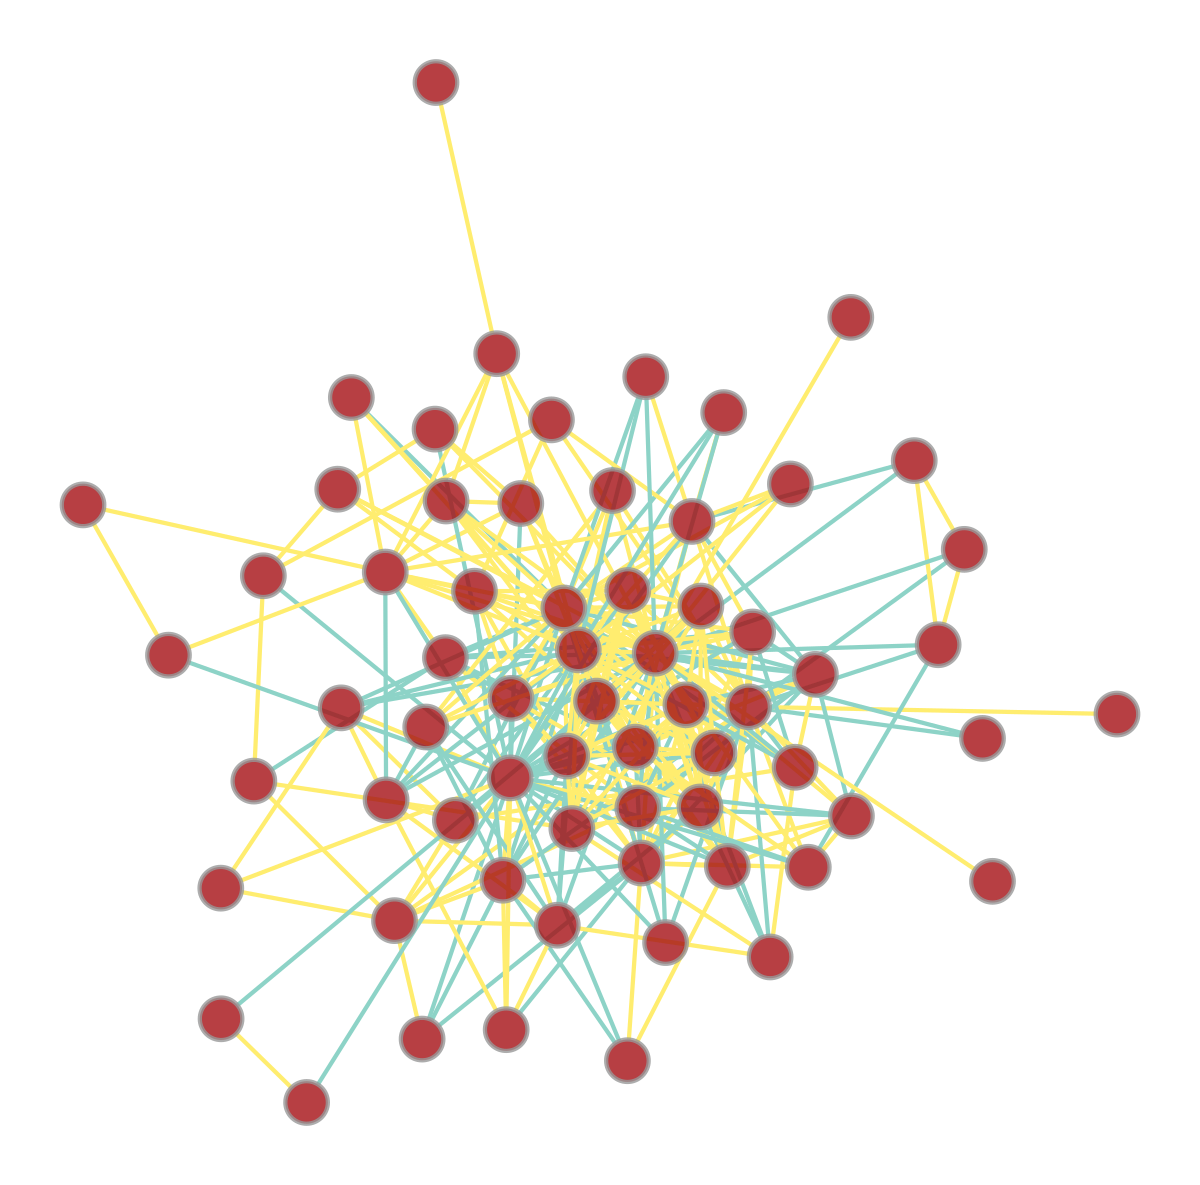

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa1c293b80, at 0x7ffa1c2939a0>

In [54]:
gt.graph_draw(g, pos=pos, edge_color=polarity)

## GraphViews

Filter by polarity (only get ally interactions)

In [55]:
p = gt.GraphView(g, efilt=polarity)

Get only the largest component

In [59]:
largest_cc = gt.label_largest_component(p)
p = gt.GraphView(p, vfilt=largest_cc)

Create a new vertex property with character names

In [78]:
names = dict(zip(nodes['id'], nodes['name']))

In [82]:
chars = g.new_vertex_property('string')
for v in names:
    chars[v] = names[v]

In [90]:
text_size = p.degree_property_map('out')
text_size.a = 1.5 * np.sqrt(text_size.a)

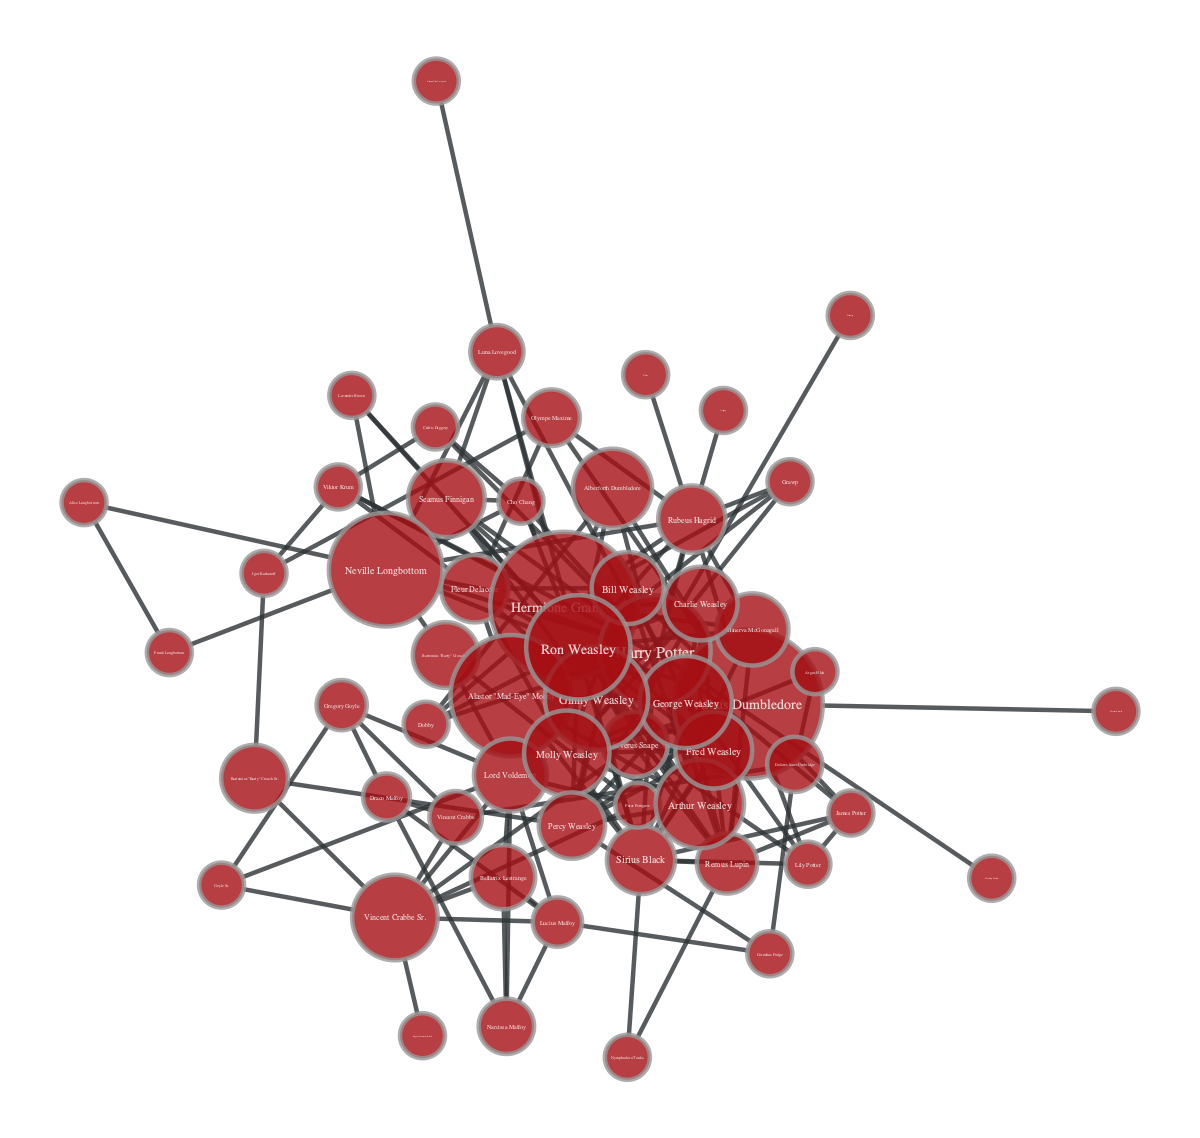

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa1c293b80, at 0x7ffa1c2939a0>

In [91]:
gt.graph_draw(p, pos=pos, vertex_text=chars, vertex_font_size=text_size)

Adjust positions

In [92]:
pos = gt.arf_layout(p)

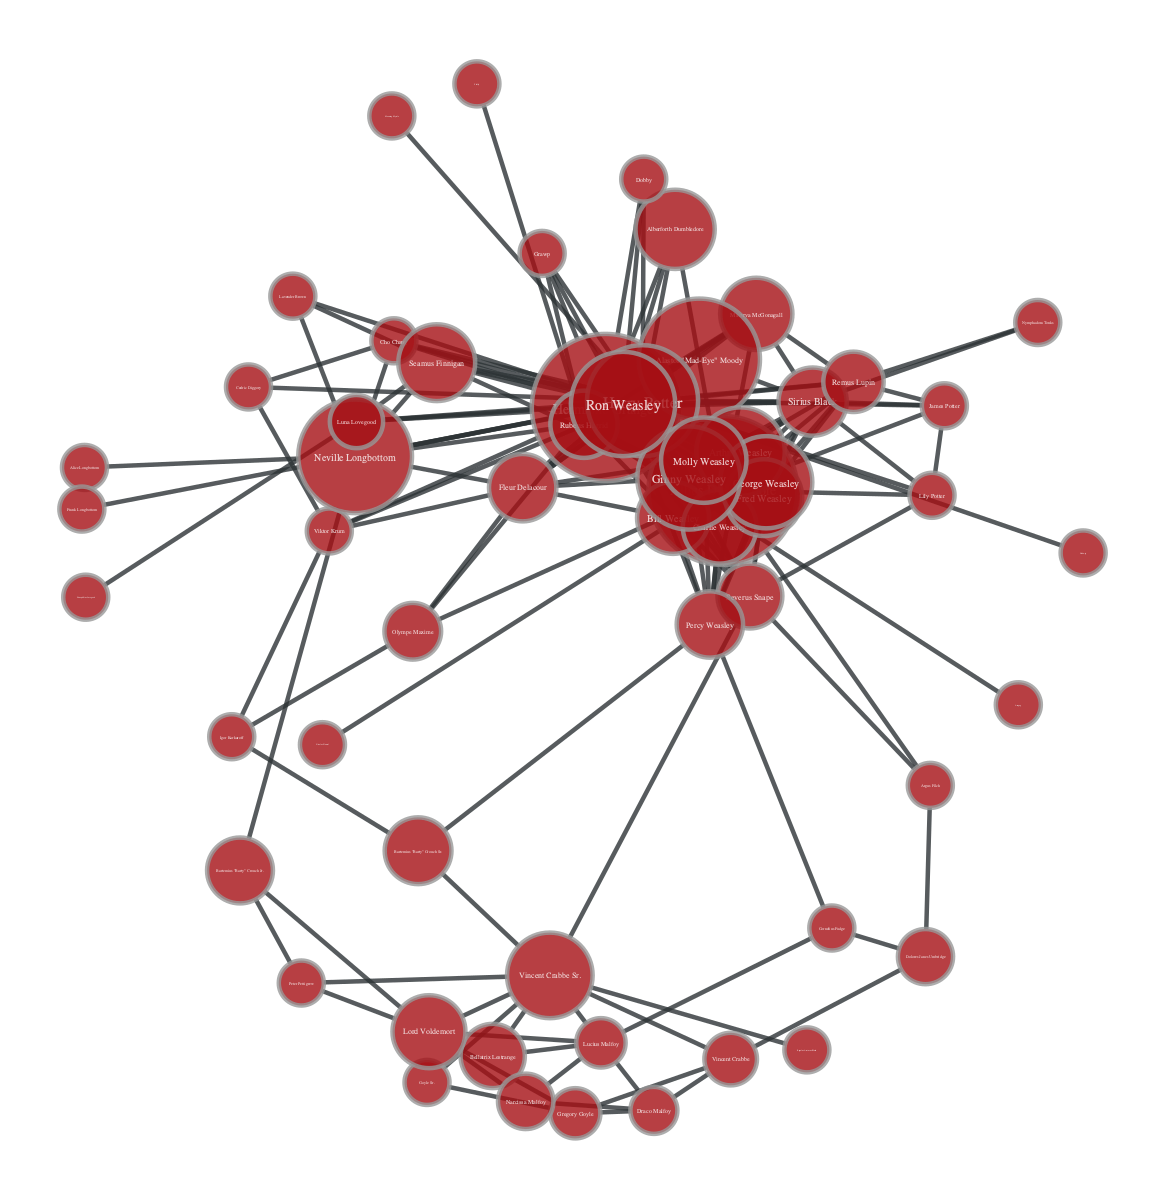

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa1cd6fc70, at 0x7ffa1e507f70>

In [93]:
gt.graph_draw(p, pos=pos, vertex_text=chars, vertex_font_size=text_size)

## Community detection

We will use inferencial statistics to get the communities within harry potter allies.

In [94]:
state = gt.minimize_blockmodel_dl(p)

In [96]:
blocks = state.get_blocks()

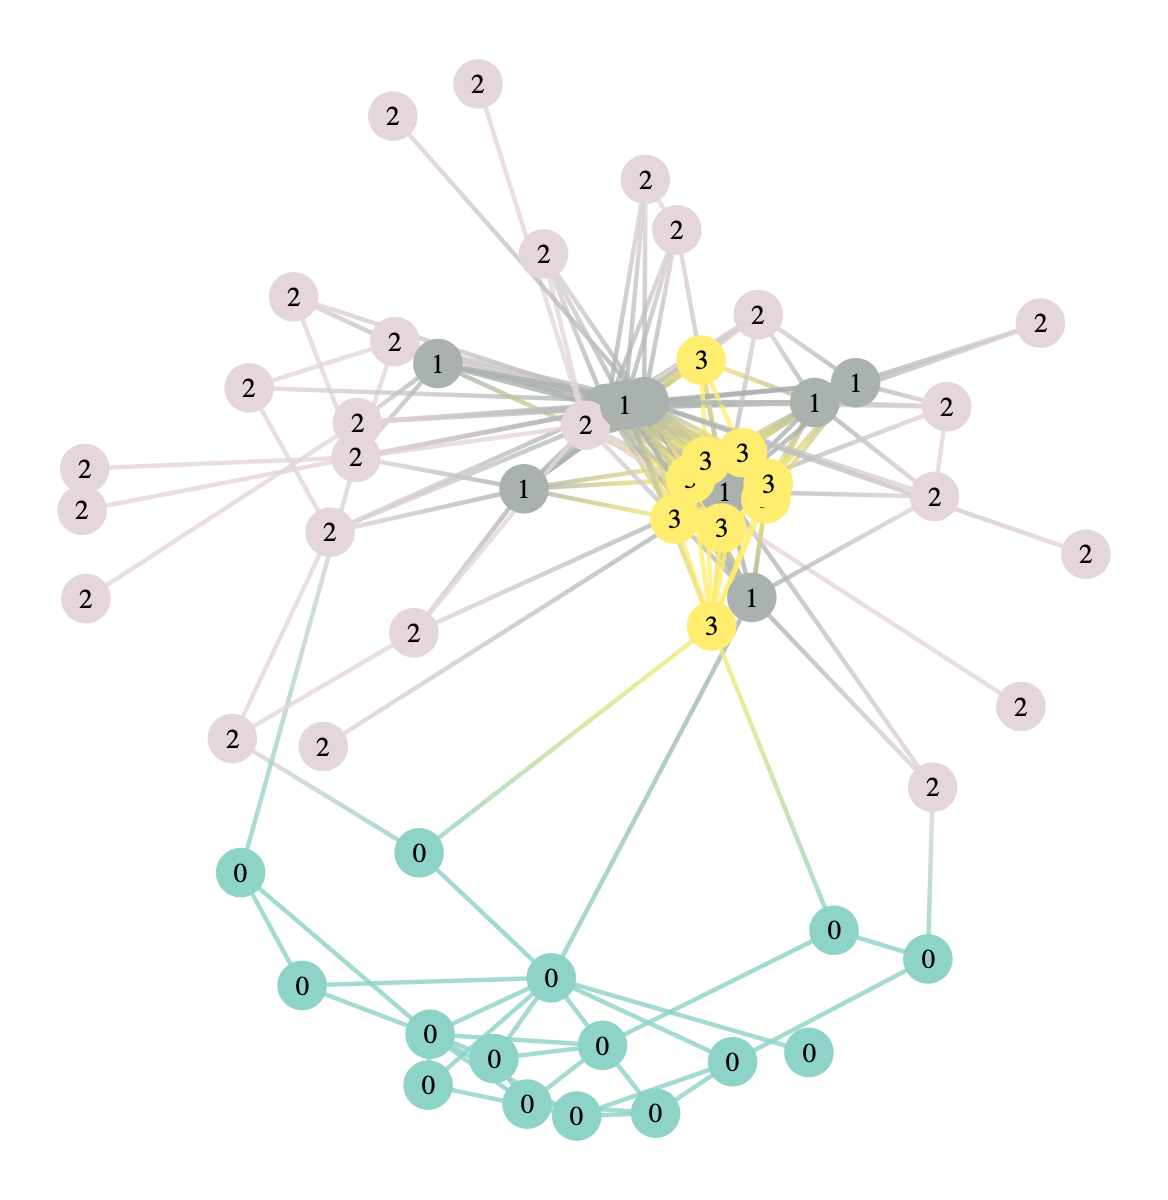

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa1cd6fc70, at 0x7ffa1e507f70>

In [100]:
state.draw(pos=pos, vertex_text=blocks)

Merge blocks with nodes to see their communities.

In [104]:
lab_blocks = pd.DataFrame()
lab_blocks['id'] = range(g.num_vertices())
lab_blocks['block'] = blocks.a

coms = pd.merge(nodes, lab_blocks)

In [110]:
coms[coms['block']==2]

,id,name,bio,block
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,2
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...,2
9,9,Cedric Diggory,Participated in the Triwizard tournament and g...,2
10,10,Alberforth Dumbledore,Albus' brother and owner of Hog's Head.,2
15,15,Argus Filch,Squib caretake of Hogwards.,2
17,17,Nicolas Flamel,Creator of the Philosopher's Stone.,2
22,22,Rubeus Hagrid,Half-giant who loves Harry. He was the keeper ...,2
23,23,Igor Karkaroff,Highmaster of Durmstrang and reformed death-ea...,2
24,24,Viktor Krum,Participant in the Triwizard tournament. Dated...,2
26,26,Alice Longbottom,Mother of Neville who was tortured by Bellatrix.,2
